In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Roots of Polynomials

We want to find the roots of a polynomial of degree $n$: 
\
\
$$ f(x) = c_0 + c_1 x + c_2 x^2 + c_3 x^3 + \cdots + c_{n} x^{n}$$
\
\
Finding the roots presents a couple of problems. First, we know from that an $n$-degree polynomial has $n$ roots. The goal is to find multiple roots. Second, we can also encounter imaginary roots.

## Finding roots one at a time using Newton's method

We solve for the roots of a $n$-degree poylnomial using the codes we implemented in prior notebooks. We will be using Newton's method. Our problem requires Newton's method to find all $x^*$. We do this one at a time.

### Example: Legendre polynomials

The $P_n(x)$ is an $n$th-degree polynomial. An important fact is that the true roots lie in the range
\
\
$$\cos\left(\frac{2i + 1}{2n+1} \pi\right) \le x_i^* \le \cos\left(\frac{2i + 2}{2n + 1} \pi\right)$$
\
\
So, we allow Newton's method to start from 
\
\
$$x_i^{(0)} = \cos \left(\frac{4i + 3}{4n + 2} \pi\right)$$
\
\
We code up $P_n(x)$ and its corresponding derivative:

In [17]:
def legendre(n, x):
    # n=0 case
    if n==0:
        val2 = 1
        dval2 = 0
        
    # n=1 case
    elif n==1:
        val2 = x
        dval2 = 1
        
    # general n
    else:
        val0 = 1
        val1 = x
        
        for j in range(1,n):
            val2 = ((2*j + 1)*x*val1 - j*val0) / (j+1)
            val0, val1 = val1, val2
        
        dval2 = n*(val0 - x*val1) / (1. - x**2)
        
    return val2, dval2

# Plot

<IPython.core.display.Javascript object>


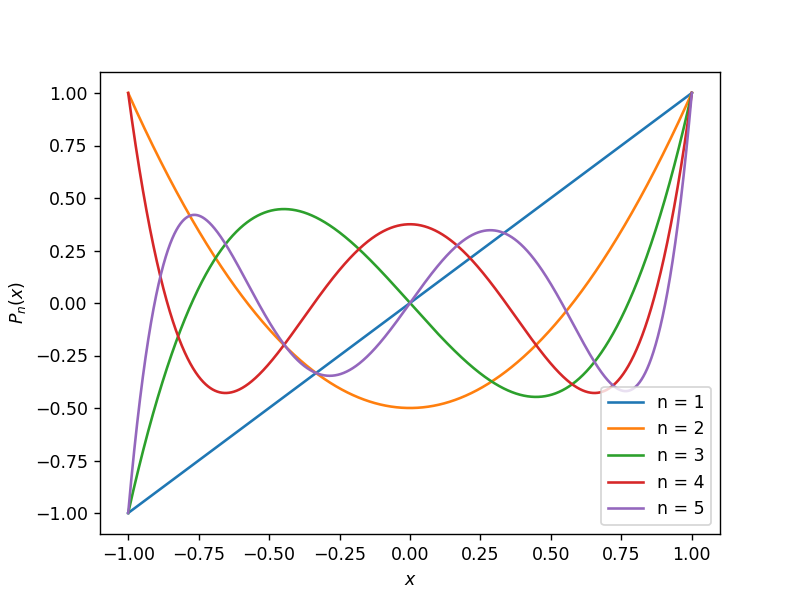

<ipython-input-17-9a79f283ccd0>:21: RuntimeWarning: invalid value encountered in true_divide
  dval2 = n*(val0 - x*val1) / (1. - x**2)
<ipython-input-17-9a79f283ccd0>:21: RuntimeWarning: invalid value encountered in true_divide
  dval2 = n*(val0 - x*val1) / (1. - x**2)
<ipython-input-17-9a79f283ccd0>:21: RuntimeWarning: invalid value encountered in true_divide
  dval2 = n*(val0 - x*val1) / (1. - x**2)
<ipython-input-17-9a79f283ccd0>:21: RuntimeWarning: invalid value encountered in true_divide
  dval2 = n*(val0 - x*val1) / (1. - x**2)


In [23]:
x = np.linspace(-1,1,10000)

plt.figure()

for n in range(1,6):
    plt.plot(x, legendre(n, x)[0], label="n = {}".format(n))
    
plt.xlabel(r'$x$')
plt.ylabel(r'$P_n(x)$')
plt.legend(loc=4)

# Finding the roots

In [55]:
def legnewton(n, xold, kmax=200, tol=1.e-8):
    '''
    Gets the roots given an initial value.
    
    '''
    for k in range(1,kmax):
        val, dval = legendre(n, xold)
        
        # Newton's method
        xnew = xold - val/dval
        
        xdiff = xnew - xold
        if abs(xdiff / xnew) < tol:
            break
            
        xold = xnew
      
    return xnew


def legroots(n):
    '''
    Obtains all roots.
    
    '''
    # Initialize the roots. This will be updated later on
    roots = np.zeros(n)
    
    npos = n//2 # Floor division
    
    # Only examine one half of the roots. Exploit symmetry
    for i in range(npos):
        # Gets initial value
        xold = np.cos(np.pi * (4*i + 3) / (4*n + 2))
        
        # Finds the nearest root using Newton's method
        root = legnewton(n,xold)
        
        # Since the roots are symmetric around zero
        roots[i] = -root
        roots[-1-i] = root
    
    return roots

In [56]:
roots = legroots(9)
roots

array([-0.96816024, -0.83603111, -0.61337143, -0.32425342,  0.        ,
        0.32425342,  0.61337143,  0.83603111,  0.96816024])

<IPython.core.display.Javascript object>


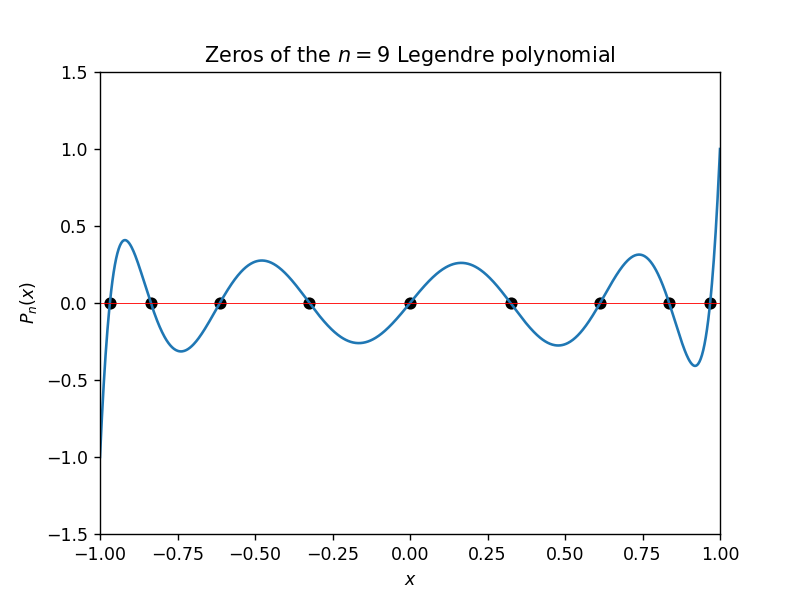

<ipython-input-17-9a79f283ccd0>:21: RuntimeWarning: invalid value encountered in true_divide
  dval2 = n*(val0 - x*val1) / (1. - x**2)


Text(0.5, 1.0, 'Zeros of the $n = $9 Legendre polynomial')

In [57]:
n = 9
x = np.linspace(-1,1,1000)
roots = legroots(n)

plt.figure()
plt.plot(x, legendre(n, x)[0], label="n = {}".format(n))
plt.scatter(roots, legendre(n, roots)[0], color='k')
plt.axhline(y=0, color='r', linestyle='-', lw=0.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$P_n(x)$')
plt.xlim(-1,1)
plt.ylim(-1.5,1.5)
plt.title(r'Zeros of the $n = ${} Legendre polynomial'.format(n))

# Eigenvalue approach